In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering

In [3]:
df =  pd.read_csv("iris.csv",names=['sepal length', 'sepal width', 'petal length', "petal width",'Class'])
df.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Data Preprocessing:
    -----------

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['Class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

In [6]:
df.describe()


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
print(df.isna().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
Class           0
dtype: int64


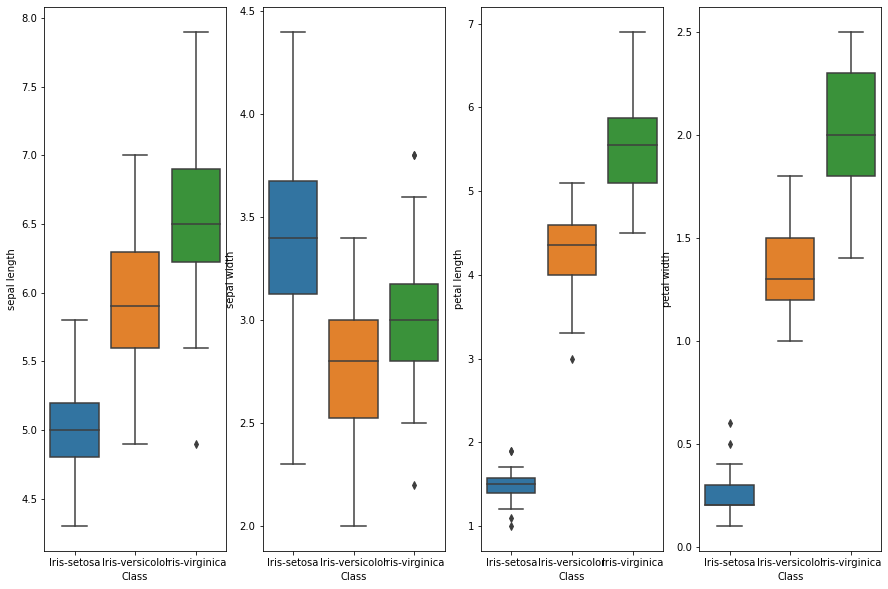

In [8]:
f, axes = plt.subplots(1, 4 ,figsize=(15,10))

sns.boxplot(  y="sepal length", x= 'Class', data=df,  orient='v' , ax=axes[0])
sns.boxplot(  y="sepal width", x= 'Class', data=df,  orient='v' , ax=axes[1])
sns.boxplot(  y="petal length", x= 'Class', data=df,  orient='v' , ax=axes[2])
sns.boxplot(  y="petal width", x= 'Class', data=df,  orient='v' , ax=axes[3])

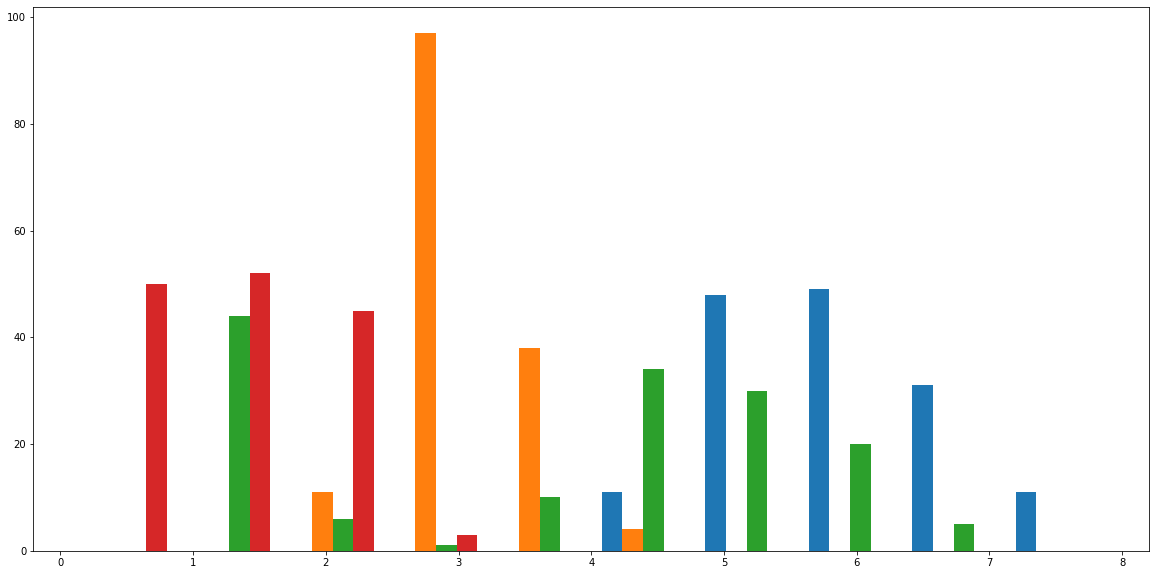

In [9]:
#red= df['petal width']
#green= df['petal length']
#orange= df['sepal width']
#blue= df['sepal length']
plt.figure(figsize=(20, 10))
plt.hist([df['sepal length'],df['sepal width'],df['petal length'],df['petal width']])
plt.show()


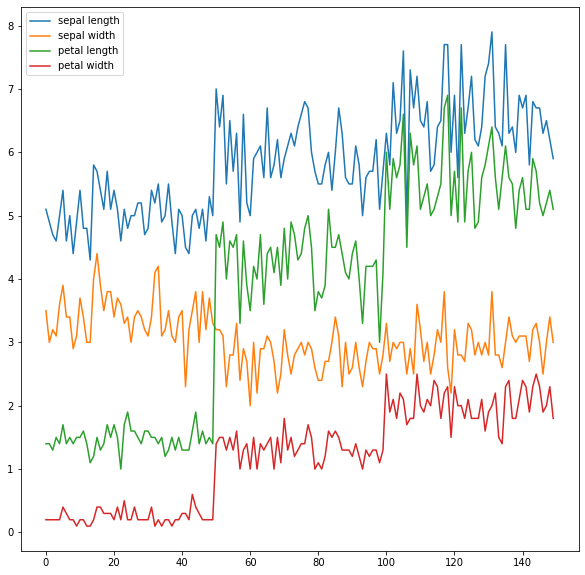

In [10]:
df.plot(figsize=(10,10))

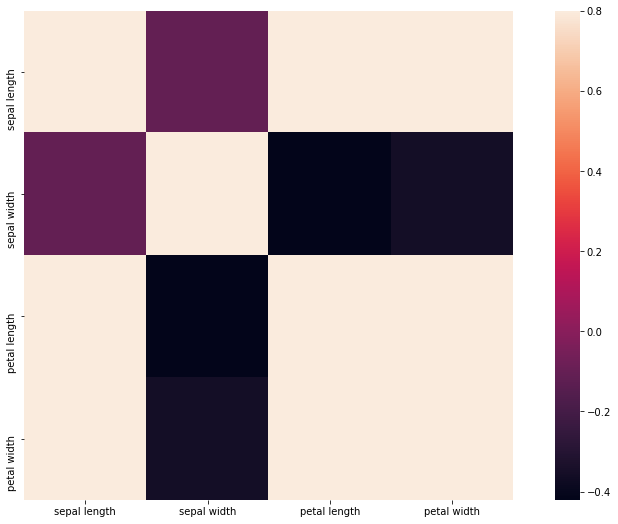

In [11]:
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(df.corr(), vmax=.8, square=True);

In [12]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [13]:
df['Class'] = df['Class'].astype('category')

In [14]:
df['Class'] = df['Class'].cat.codes


In [15]:
df['Class'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

Clustring:
    ---------------

In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


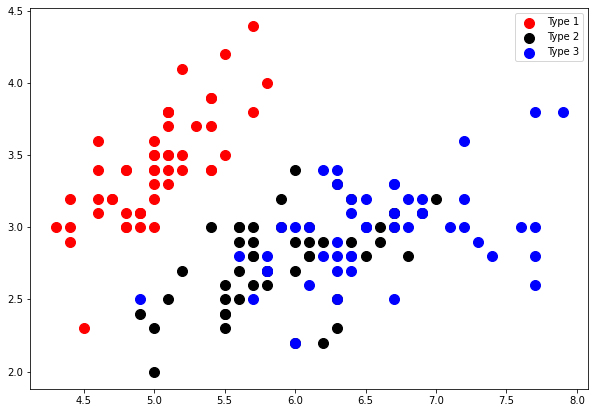

In [17]:
#before clustering
plt.figure(figsize=(10, 7))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=100, c='red', label='Type 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, c='black', label='Type 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, c='blue', label='Type 3')
plt.legend()
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3)

In [19]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [20]:
y_kmeans = kmeans.predict(X)

In [21]:
#k-means accracy
accuracy_score(y, y_kmeans)

0.24

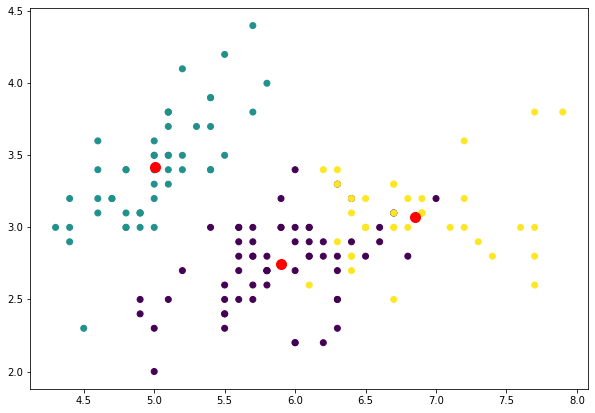

In [22]:
#after K-means
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1], c=y_kmeans);
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color="red"); 

In [23]:
cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')


In [24]:
cluster.fit(X)

AgglomerativeClustering(n_clusters=3)

In [25]:
#AgglomerativeClustering accuracy
accuracy_score(y, cluster.labels_)

0.23333333333333334

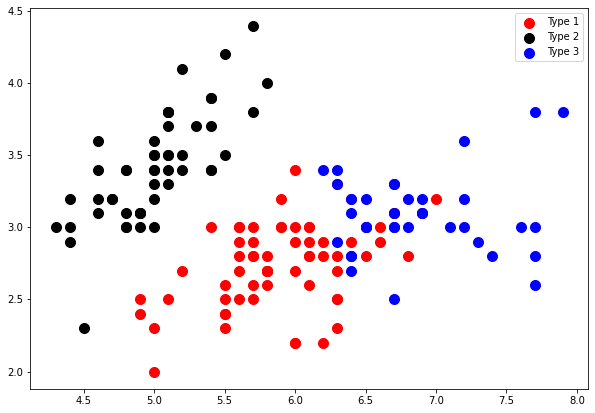

In [26]:
#after AgglomerativeClustering
plt.figure(figsize=(10, 7))
plt.scatter(X[cluster.labels_ == 0, 0], X[cluster.labels_ == 0, 1], s = 100, c = 'red', label = 'Type 1')
plt.scatter(X[cluster.labels_ == 1, 0], X[cluster.labels_ == 1, 1], s = 100, c = 'black', label = 'Type 2')
plt.scatter(X[cluster.labels_ == 2, 0], X[cluster.labels_ == 2, 1], s = 100, c = 'blue', label = 'Type 3')
plt.legend()
plt.show()

In [27]:
df.to_csv("dataForPart2.csv")